In [ ]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import unicodedata
import re
import spacy
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Turing Talks.csv')

In [ ]:
df.head()

,url,title,subtitle,author,claps,reading_time,date,text
0,https://medium.com/turing-talks/turing-talks-1...,O que é o Teste de Turing?,Entenda a lógica por trás do teste proposto pe...,Rodrigo Magaldi,534,5,2019-02-17,Consideremos a seguinte questão: as máquinas c...
1,https://medium.com/turing-talks/turing-talks-2...,O que é Machine Learning?,NaN,Rodrigo Estevam,441,5,2019-04-28,Olá grandes entusiastas de Inteligência Artifi...
2,https://medium.com/turing-talks/turing-talks-3...,Aplicações | Carcinoma Hepatocelular,Como a Inteligência Artificial pode ajudar na ...,Felipe Augusto de Moraes Machado,600,5,2019-05-12,Imagine a seguinte situação: você possui carci...
3,https://medium.com/turing-talks/turing-talks-4...,Programação | Python — Parte 1,NaN,Lucas Fentanes Machado,731,9,2019-05-19,Uma introdução a uma das linguagens de program...
4,https://medium.com/turing-talks/turing-talks-5...,Programação | Python — Parte 2,Mais detalhes sobre uma das linguagens de prog...,Fernando Matsumoto,546,10,2019-05-26,"Na semana passada, passamos o básico da lingua..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           110 non-null    object
 1   title         110 non-null    object
 2   subtitle      81 non-null     object
 3   author        110 non-null    object
 4   claps         110 non-null    int64 
 5   reading_time  110 non-null    int64 
 6   date          110 non-null    object
 7   text          110 non-null    object
dtypes: int64(2), object(6)
memory usage: 7.0+ KB


#1 pré-processamento:

In [ ]:
df['text'][4]

"Na semana passada, passamos o básico da linguagem de programação Python. Introduzimos conceitos básicos como variáveis, atribuições e operações, assim como print, input e listas. Nesta semana, o nosso objetivo é terminar essa introdução, introduzindo conceitos como loops e funções. Poderemos então utilizar esses novos conhecimentos para explorar as áreas de Data Science e Machine Learning. Existe uma função range(a,b,c) em Python que cria uma sequência de números automaticamente¹, sendo apenas necessário identificar o início a, o fim b e o passo c. Os números começam em a e aumentam até atingirem b (note que b não é incluído na sequência). O passo c é a diferença entre números consecutivos nessa sequência. Por exemplo: Mais formalmente, a função range pode ser definida da seguinte maneira: range(a,b,c) ≡ [a, a+1c, a+2c, a+3c, … ,❋] , ❋<b, ❋+c≥b. Saiba que colocar apenas dois termos em range() fará com que o passo seja automaticamente igual a 1 (range(a,b) == range(a,b,1)), ou seja, ra

In [ ]:
df['texto_limpo']=df['text']

Tokenização:

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Remoção de stopwords:

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Uso do isalpha para retirar as pontuações especiais e símbolos matemáticos dos códigos utilizados e do .lower() para deixar o texto inteiro em letras minúsculas.

Os quatro processo feitos de uma vez.

In [ ]:
def tokenização_remov_stopwords(text):
  return [w for w in word_tokenize(text.lower()) if w.isalpha() and w not in stopwords ]
df['texto_limpo']=df['texto_limpo'].apply(tokenização_remov_stopwords)
df['texto_limpo']

0      [consideremos, seguinte, questão, máquinas, co...
1      [olá, grandes, entusiastas, inteligência, arti...
2      [imagine, seguinte, situação, possui, carcinom...
3      [introdução, linguagens, programação, utilizad...
4      [semana, passada, passamos, básico, linguagem,...
                             ...                        
105    [usando, tweets, medir, similaridade, candidat...
106    [texto, escrito, kauã, fillipe, letícia, falco...
107    [olá, edição, turing, talks, hoje, explicaremo...
108    [texto, escrito, césar, augusto, davi, félix, ...
109    [olá, querido, leitor, turing, talks, imagine,...
Name: texto_limpo, Length: 110, dtype: object

In [ ]:
for i in df.index:
    df.loc[i, 'texto_limpo'] = " ".join(df.loc[i, 'texto_limpo'])

In [ ]:
df['texto_limpo'][4]

'semana passada passamos básico linguagem programação python introduzimos conceitos básicos variáveis atribuições operações assim print input listas nesta semana objetivo terminar introdução introduzindo conceitos loops funções poderemos então utilizar novos conhecimentos explorar áreas data science machine learning existe função range b c python cria sequência números sendo apenas necessário identificar início fim b passo números começam aumentam atingirem b note b incluído sequência passo c diferença números consecutivos nessa sequência exemplo formalmente função range pode definida seguinte maneira range b c b saiba colocar apenas dois termos range fará passo automaticamente igual range b range range b range bom saber dar função apenas número fará lista começa zero passo igual comprimento igual valor dado função range range então range range sequência números comporta lista algumas diferenças exemplo pode adicionar números sequência usando função transformar sequência lista basta us

Lemmatização:

In [ ]:
!python3 -m spacy download pt_core_news_sm

2023-10-06 00:48:42.721534: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 43.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
spc = spacy.load('pt_core_news_sm')
def lemmat (texto):
  spc_letras = spc(texto)
  lemmas = [token.lemma_ for token in spc_letras]
  texto_completo = " ".join(lemmas)
  texto_completo= texto_completo.lower()
  return texto_completo
df['texto_limpo']= df['texto_limpo'].apply(lemmat)

In [ ]:
df['texto_limpo'][4]

'semana passado passar básico linguagem programação python introduzimo conceito básico variável atribuição operação assim print input lista em este semana objetivo terminar introdução introduzir conceito loop função poder então utilizar novo conhecimento explorar área data science machine learning existir função range b c python criar sequência número ser apenas necessário identificar início fim b passo número começar aumentar atingir b note b incluir sequência passo c diferença número consecutivo em esse sequência exemplo formalmente função range poder definida seguinte maneira range b c b saber colocar apenas dois termo rangir fará passo automaticamente igual range b range range b range bom saber dar função apenas número fazer lista começar zero passo igual comprimento igual valor dar função range range então range range sequência número comportar listar algum diferença exemplo poder adicionar número sequência usar função transformar sequência lista bastar usar list range b c python 

É possível ver algumas falhas, como o algoritmo reconhecendo introduzimos como um sujeito no plural e não um verbo conjugado na primeira pessoa do plural. Porém é possível ver sua ajuda geral no resto do texto.

#2 Análise do corpus:

## análise das relações do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           110 non-null    object
 1   title         110 non-null    object
 2   subtitle      81 non-null     object
 3   author        110 non-null    object
 4   claps         110 non-null    int64 
 5   reading_time  110 non-null    int64 
 6   date          110 non-null    object
 7   text          110 non-null    object
 8   texto_limpo   110 non-null    object
dtypes: int64(2), object(7)
memory usage: 7.9+ KB


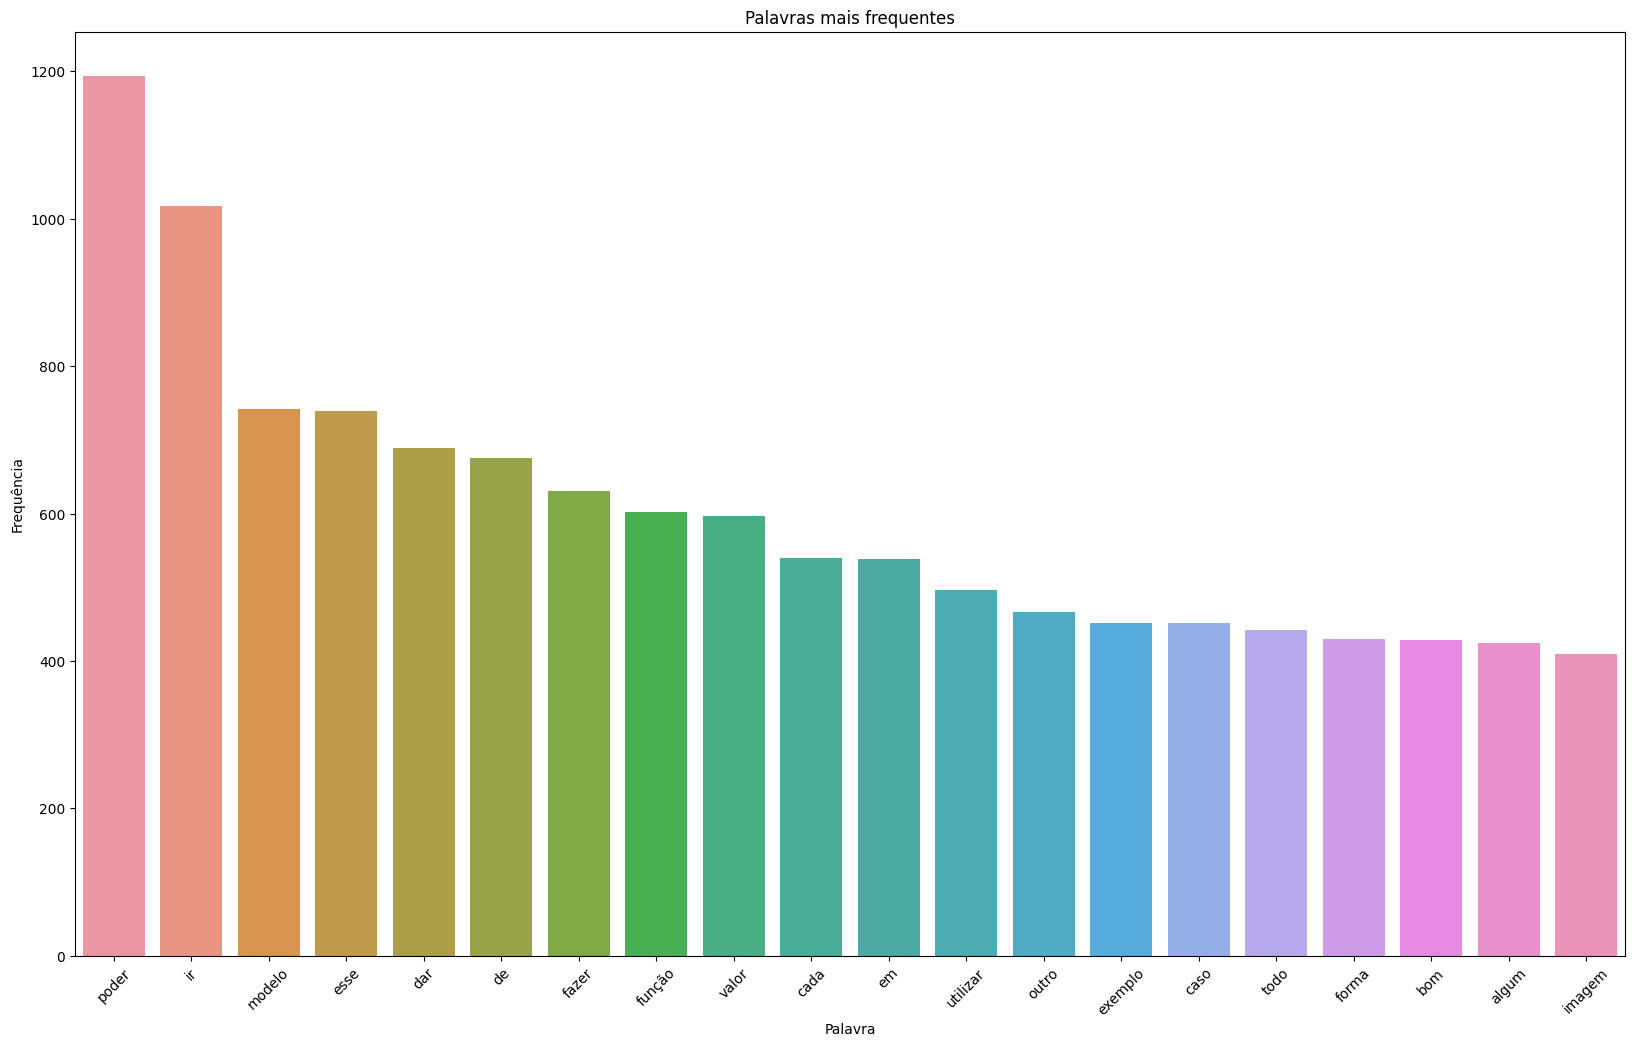

In [ ]:
#Primeiro vou fazer a contagem das palavras mais usadas
from collections import Counter
todos_textos = ' '.join(df['texto_limpo'])
palavras = todos_textos.split()
contagem_palavras = Counter(palavras)
palavras_mais_frequentes = contagem_palavras.most_common(20)
plt.figure(figsize=(20, 12))
sns.barplot(x=[item[0] for item in palavras_mais_frequentes], y=[item[1] for item in palavras_mais_frequentes])
plt.title("Palavras mais frequentes")
plt.xlabel("Palavra")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()

Nessas palavras mais utilizadas, não muitas informações podem ser extraídas. Primeiro é possível ver que algumas stopwords não são retidas pela função do nltk em português, como "de". Outro problema para entender o dataset por esse gráfico é que muitas palavras, apesar de não serem stopwords, não trazem muita informação, pois são verbos muito usados normalmente, ou palavras como "exemplo". Ainda algumas demonstram a realidade temática do dataset, como "modelo" ou "função"

In [ ]:
df['tamanho_texto'] = df['text'].apply(lambda x: len(x.split()))

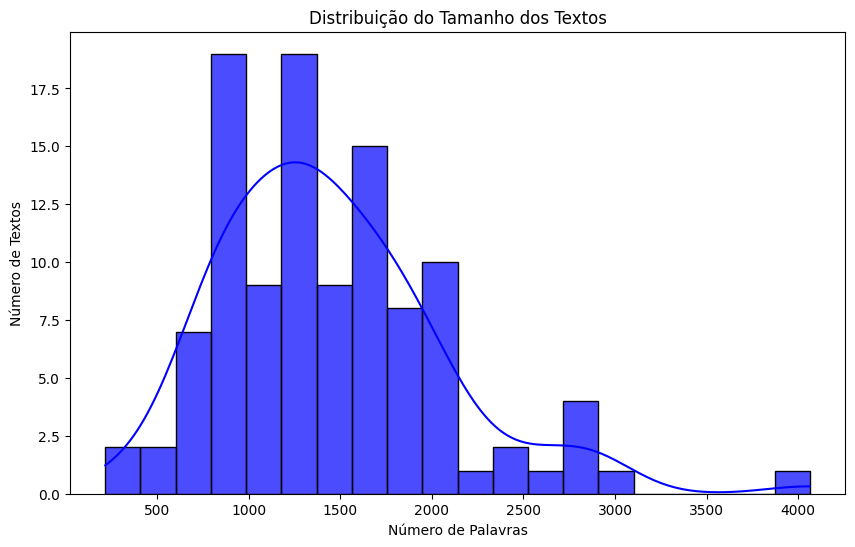

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tamanho_texto', bins=20, color='blue', alpha=0.7, kde=True)
plt.title("Distribuição do Tamanho dos Textos")
plt.xlabel("Número de Palavras")
plt.ylabel("Número de Textos")
plt.show()

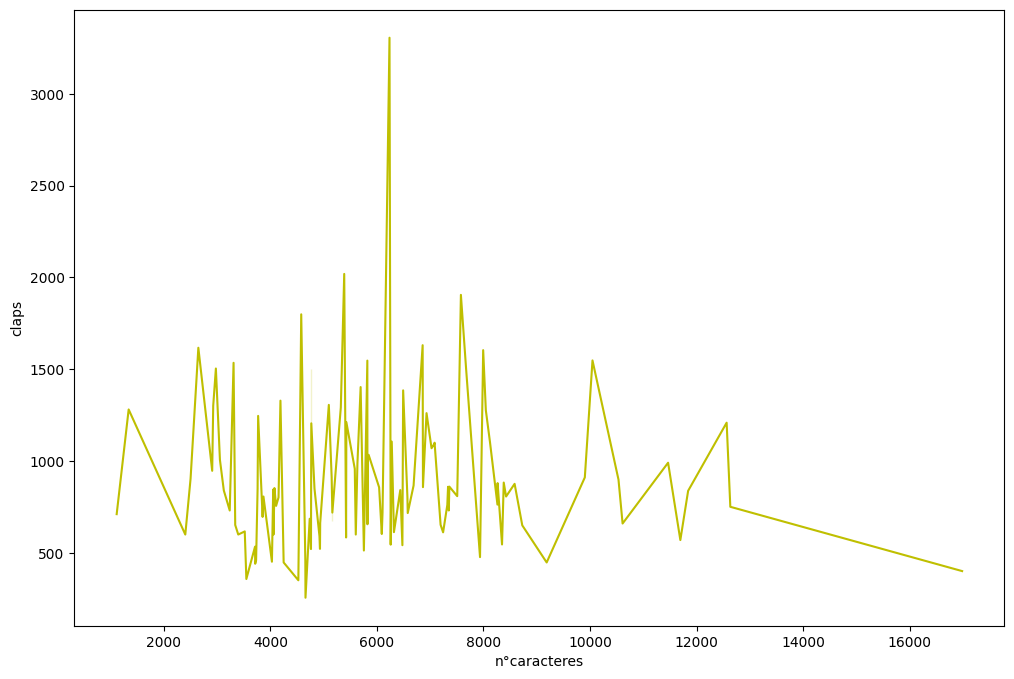

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x=df['texto_limpo'].apply(len), y= df['claps'], color='y')
plt.xlabel('n°caracteres')
plt.show()

In [ ]:
df_analise=df.copy()
df_analise['lista_palavras']=df_analise['texto_limpo'].apply(word_tokenize)
df_analise['palavras_unicas']= [set(i) for i in df_analise['lista_palavras']]

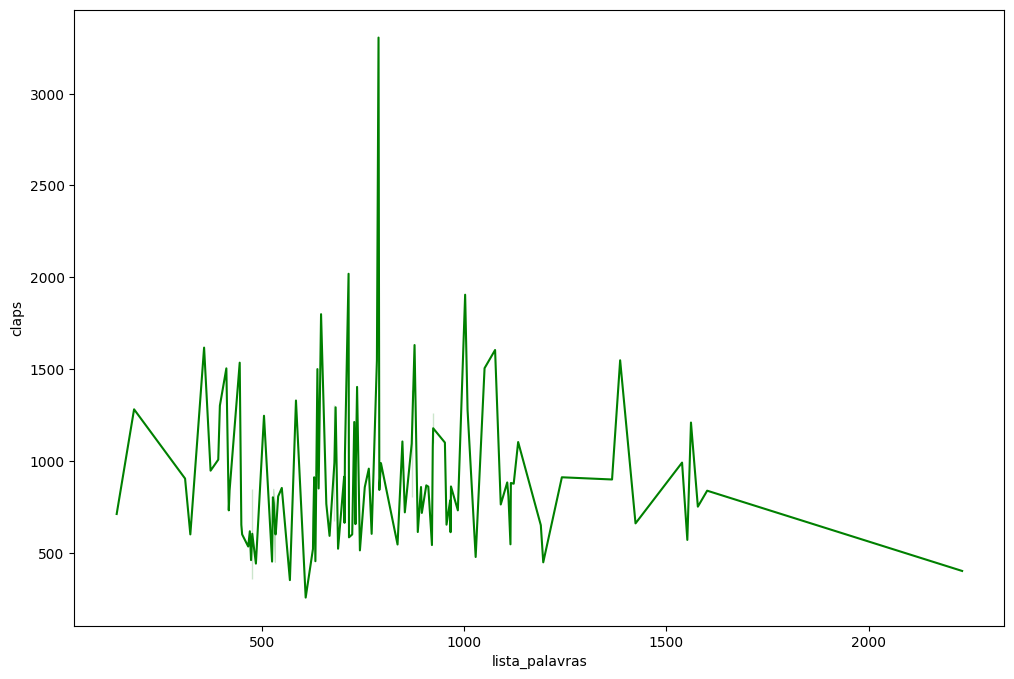

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_analise, x=df_analise['lista_palavras'].apply(len), y= df_analise['claps'], color='g')
plt.show()

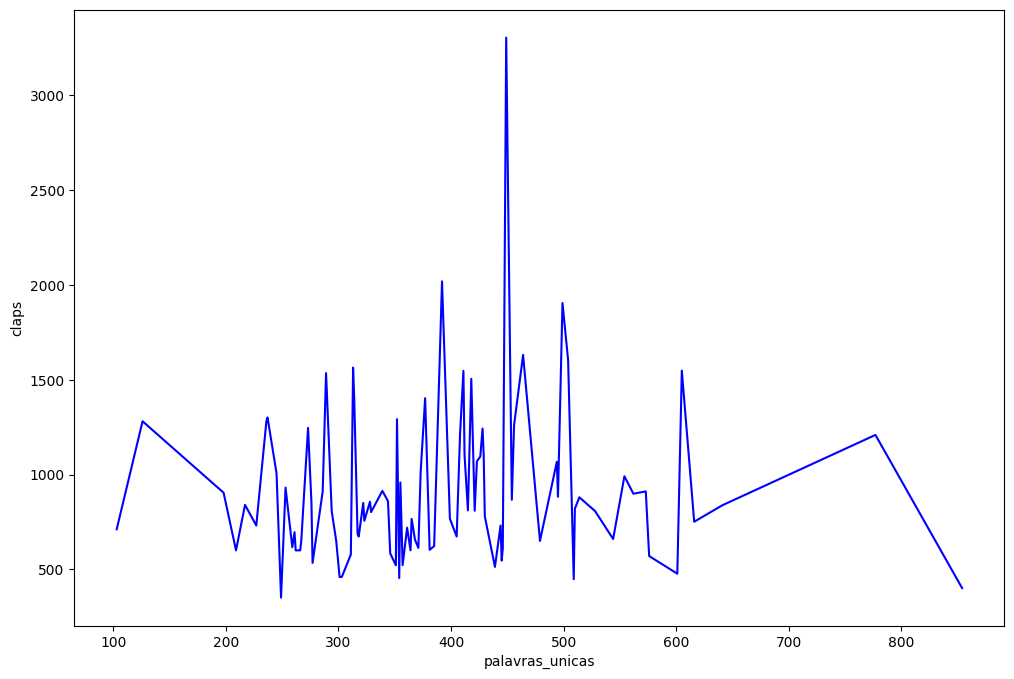

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_analise, x=df_analise['palavras_unicas'].apply(len), y= df_analise['claps'], color = 'b', errorbar=None)
plt.show()

A quantidade de caracteres, palavras ou palavras únicas não apresenta uma relação linear com a quantidade de claps nem mesmo algum padrão visível.

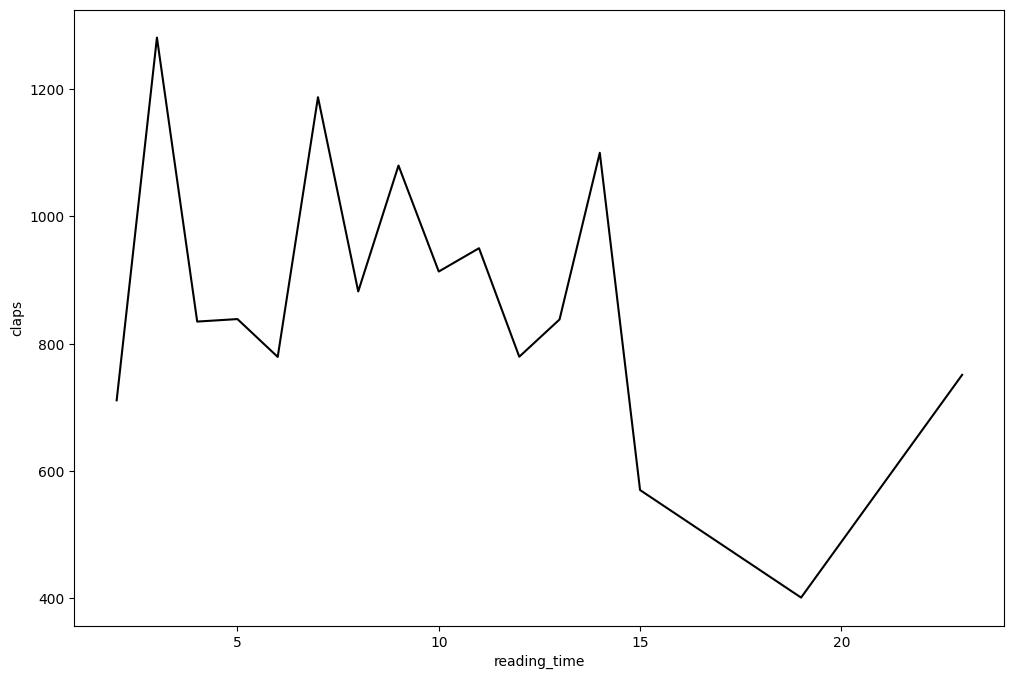

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x=df['reading_time'], y=df['claps'], errorbar=None, color='k')
plt.show()

O reading time não tem um padrão muito proporcional com o número de claps, até porque o número de dados é pequeno

In [ ]:
len(df['author'].unique())

50

Não dá para ser usado de base na previsão de claps, pois há apenas 110 textos, logo a quantidade de textos por autor ficar muito baixa para uma análise de influência

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['ano'] = df['date'].dt.year
df_ano = df.groupby('ano')['claps'].mean().reset_index()

In [ ]:
df_ano

,ano,claps
0,2019,720.230769
1,2020,1218.217391
2,2021,727.037037
3,2022,563.363636


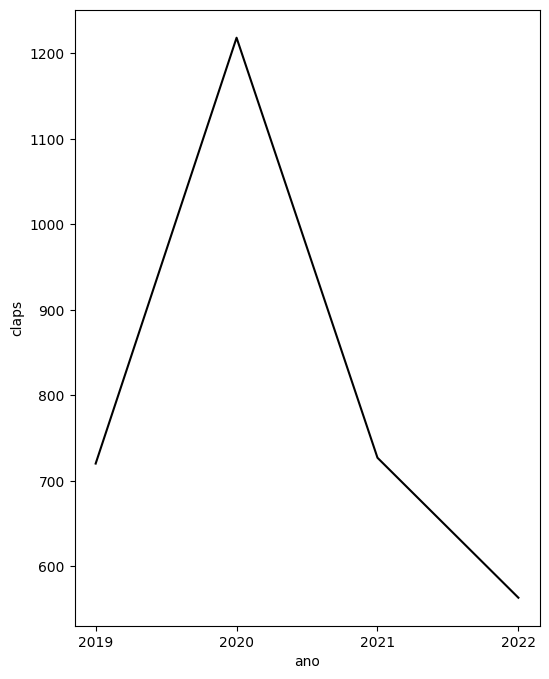

In [ ]:
plt.figure(figsize=(6, 8))
sns.lineplot(data=df_ano, x='ano', y='claps', color='k')
plt.xticks(df_ano['ano'])
plt.show()

In [ ]:
df['ano'].value_counts().sort_index()

2019    26
2020    46
2021    27
2022    11
Name: ano, dtype: int64

Uma relação interessante se mostra, o número de postagens ser proporcional a média de claps, estranhamente sendo quase igual a média de claps de 2019 e 2021, dois anos com números quase iguais de postagens.

##POS-Tagging:

In [ ]:
df['texto_limpo'][9]

'quão bem aprender erro experiência passar mal preocupe de esse artigo entender bom sobre conceito predição poder impactar projeto machine learning de esse forma menos algoritmo ir tomar decisão certo conceito machine learning basear construção algoritmos maneira possibilitar computador tomer decisão acordo situação dar inserir em ele ser assim implementar algoritmo seguir instrução rotino sim treinar máquina aprender executar tarefa possível máquina aprender existir três tipo aprendizagem máquina supervisionar supervisionar reforço caso querer saber sobre assunto machine learning existir explicação detalhir em este post bem agora saber sobre machine learning tipo aprendizagem máquina querer criar modelo fazer ver diferentes tipo modelo posts futuro contudo antes avançarr preciso entender algum conceito ligar aspecto básico predição buscar determinar valor exemplo determinar preço automóvel basear ano fabricar usar quilometragem etc categor precisar modelo predição precisar função apro

In [ ]:
df['text'][9]

'O quão bem você aprende com seus erros e experiências passadas? Mal? Não se preocupe, depois desse artigo você entenderá melhor sobre conceitos de predição e como eles podem impactar o seu projeto de machine learning. Dessa forma, pelo menos seu algoritmo vai tomar as decisões certas! O conceito de Machine Learning é baseado na construção de algoritmos de maneira a possibilitar que o computador tome decisões de acordo com as situações e dados inseridos nele. Sendo assim, não se está implementando um algoritmo que segue instruções em uma rotina e sim treinando a máquina para aprender como executar a tarefa. Mas como é possível a máquina aprender? Existem três tipos de aprendizagem de máquina, o supervisionado, o não supervisionado e o por reforço. Caso queira saber mais sobre o assunto e machine learning, existe uma explicação em detalhes neste post! Bem, agora você já sabe sobre machine learning, e os tipos de aprendizagem de máquina e quer criar um modelo! Mas como fazer? Veremos dif

Escolherei a primeira frase do dataset e pré-processado e não pré-processado para avaliar o POS-tagging.

In [ ]:
frase_limpa= 'quão bem aprender erro experiência passar mal preocupe de esse artigo entender bom sobre conceito predição poder impactar projeto machine learning'
frase='O quão bem você aprende com seus erros e experiências passadas? Mal? Não se preocupe, depois desse artigo você entenderá melhor sobre conceitos de predição e como eles podem impactar o seu projeto de machine learning.'

In [ ]:
ptfrase_limpa=spc(frase_limpa)
for token in ptfrase_limpa:
    print(f"{token.text}: {token.pos_}")

quão: ADV
bem: ADV
aprender: VERB
erro: NOUN
experiência: NOUN
passar: VERB
mal: ADV
preocupe: ADV
de: ADP
esse: DET
artigo: NOUN
entender: VERB
bom: ADJ
sobre: ADP
conceito: NOUN
predição: NOUN
poder: VERB
impactar: VERB
projeto: NOUN
machine: PROPN
learning: PROPN


In [ ]:
ptfrase=spc(frase)
for token in ptfrase:
    print(f"{token.text}: {token.pos_}")

O: DET
quão: NOUN
bem: ADV
você: PRON
aprende: VERB
com: ADP
seus: DET
erros: NOUN
e: CCONJ
experiências: NOUN
passadas: ADJ
?: PUNCT
Mal: ADV
?: PUNCT
Não: ADV
se: PRON
preocupe: ADV
,: PUNCT
depois: ADV
desse: ADP
artigo: NOUN
você: PRON
entenderá: VERB
melhor: ADJ
sobre: ADP
conceitos: NOUN
de: ADP
predição: NOUN
e: CCONJ
como: ADV
eles: PRON
podem: VERB
impactar: VERB
o: DET
seu: DET
projeto: NOUN
de: ADP
machine: PROPN
learning: PROPN
.: PUNCT


Falar da classificação ser melhor no texto não limpo e explicar pq, depois fazer análises do dataset com isso.

##NER:

In [ ]:
!pip3 install polyglot

In [ ]:
!apt install python-numpy libicu-dev
!apt install python3-icu

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-numpy
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  python3-icu
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 540 kB of archives.
After this operation, 2,780 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 python3-icu amd64 2.8.1-0ubuntu2 [540 kB]
Fetched 540 kB in 2s (294 kB/s)
Selecting previously unselected package python3-icu.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../python3-icu_2.8.1-0ubuntu2_amd64.deb ...
Unpacking python3-icu (2.8.1-0ubuntu2) ...
Setting up python3-icu (2.8.1-0ubuntu2) ...


In [ ]:
!apt autoremove

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!pip3 install pycld2

In [ ]:
!pip3 install morfessor

In [ ]:
from polyglot.text import Text

In [ ]:
from polyglot.downloader import downloader

In [ ]:
%%bash
polyglot download embeddings2.pt ner2.pt

[polyglot_data] Downloading package embeddings2.pt to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.pt is already up-to-date!
[polyglot_data] Downloading package ner2.pt to /root/polyglot_data...


In [ ]:
ttexto=Text(df['texto_limpo'][106])
ttexto.entities

[I-PER(['letícia', 'falconer']),
 I-PER(['lever']),
 I-ORG(['observer']),
 I-ORG(['amazon']),
 I-ORG(['observer']),
 I-LOC(['pando'])]

In [ ]:
documento=spc(df['texto_limpo'][106])
for named_entity in documento.ents:
    print(named_entity, named_entity.label_)

fillipe letícia falconer olá PER
turing PER
concatenarr PER
datetime lagtime window featur PER
statsmodels python PER
window featur rolling window featur rolling window featur MISC
window featur python MISC
turing PER
engineeringr MISC
turing PER
instagrr linkedin claro LOC
discord abraço PER


In [ ]:
df['texto_limpo'][106]

'texto escrever Kauã fillipe letícia falconer olá leitor turing talks texto hoje tratar sobre feature engineering série temporal assunto bastante importante dentro área ciência dar proposta de este texto introdução entendimento dar processo feature Engineering contexto série temporal primeiramente ir definir série temporal feature Engineering featur série temporal partir de isso poder entender bom relação dois conceito seguir seguinte estrutura ir lá série temporal poder definir conjunto observação relacionar variável disposto sequência tempo exemplificar conceito ir utilizar Dataset datasets repository fornecir jbrownlee em ele registro número passageiro linha aéreo mês dar seguinte forma ver trabalhar dataset apenas variável dado costumar registrar maneira periódico exemplo dizer anteriormente registro realizar considerar intervalo mês abaixo visualização dar outro conceito extremamente importante texto hoje feature engineering tratar propósito servir bom processo seleção dar origina

In [ ]:
ttexto1=Text(df['texto_limpo'][4])
ttexto1.entities

[I-PER(['keys']), I-PER(['pando'])]

In [ ]:
documento1=spc(df['texto_limpo'][4])
for named_entity in documento1.ents:
    print(named_entity, named_entity.label_)

python MISC
python MISC
listo PER
python MISC
while while loop MISC
keyn valuen PER
keys PER
format referenciarr valor PER
python MISC
json PER
listo PER
python MISC
return MISC
python MISC
python MISC
args kwargs PER
funçãor MISC
unsupported operand PER
python MISC


In [ ]:
df['texto_limpo'][4]

'semana passado passar básico linguagem programação python introduzimo conceito básico variável atribuição operação assim print input lista em este semana objetivo terminar introdução introduzir conceito loop função poder então utilizar novo conhecimento explorar área data science machine learning existir função range b c python criar sequência número ser apenas necessário identificar início fim b passo número começar aumentar atingir b note b incluir sequência passo c diferença número consecutivo em esse sequência exemplo formalmente função range poder definir seguinte maneira range b c b saber colocar apenas dois termo rangir fará passo automaticamente igual range b range range b range bom saber dar função apenas número fazer lista começar zero passo igual comprimento igual valor dar função range range então range range sequência número comportar listar algum diferença exemplo poder adicionar número sequência usar função transformar sequência listo bastar usar list range b c python v

In [ ]:
ttextoL=Text(df['text'][106])
ttextoL.entities

[I-PER(['Kauã', 'Fillipe']),
 I-PER(['Letícia', 'Falconer']),
 I-ORG(['jbrownlee']),
 I-PER(['Nele']),
 I-ORG(['Feature', 'Engineering']),
 I-ORG(['Engineering']),
 I-LOC(['DateTime']),
 I-PER(['Bom']),
 I-PER(['.']),
 I-LOC(['autocorrelação']),
 I-ORG(['Amazon']),
 I-PER(['fizéssemos']),
 I-PER(['.']),
 I-ORG(['Features']),
 I-ORG(['Rolling']),
 I-ORG(['USP'])]

In [ ]:
documentoL=spc(df['text'][106])
for named_entity in documentoL.ents:
    print(named_entity, named_entity.label_)

Kauã Fillipe PER
Letícia Falconer Olá PER
Turing Talks! MISC
Feature Engineering MISC
Séries Temporais MISC
Ciência de Dados LOC
monthly-airline-passengers.csv PER
Datasets MISC
Feature Engineering MISC
Climate LOC
Sheet1.csv LOC
Feature Engineering MISC
DateTime PER
LagTime MISC
Window Features MISC
Ano e Mês da coluna Month MISC
Timestamp MISC
Pandas MISC
coluna Month ORG
biblioteca Pandas LOC
Plotly LOC
Plotly PER
Timestamp LOC
Ano PER
Dia e Hora MISC
Lag PER
Usamos MISC
ACF MISC
Amazon ORG
Netflix MISC
Netflix MISC
Python MISC
Netflix MISC
Lag Features LOC
Window Features MISC
Lag Features LOC
Window Features MISC
Rolling Window MISC
Expanding Window Features MISC
Rolling Window Features ORG
Rolling Window Features ORG
Pandas LOC
Rolling Window MISC
Expanding Window Features Já MISC
Expanding Window Features ORG
Expanding Window Features ORG
python MISC
Pandas MISC
Rolling Window Features ORG
Ciência de Dados LOC
Turing Talks MISC
Feature Engineering PER
biblioteca Pandas LOC
Turin

Seja com o polyglot ou com o spacy o Named Entity Recognition não soou muito produtivo, eles acabam classificando pouca coisa e/ou de forma muitas vezes incorreta, seja com o texto pré-processado ou com o texto normal. Portanto descartarei esse uso na análise.

#3 Feature engineering:

Agora vou fazer o feature engineering, tanto com Bag of words quanto com TFIDF, para usar o modelo de predição para uma regressão linear.

Começando pelo bag of words usarei a função do sklearn para o dataset todo.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of words, com binary true para não haver contagem, apenas mostrar a existência ou não da palavra no documento.
count_vectorizer = CountVectorizer(binary=True)
X_BOW = count_vectorizer.fit_transform(df['texto_limpo'])

In [ ]:
feature_names = count_vectorizer.get_feature_names_out()

In [ ]:
count_df = pd.DataFrame(X_BOW.toarray(), columns=feature_names)

In [ ]:
count_df.head() #Funciona como um grande one-hot-encoding com todas as palavras do dataset, sendo cada documento uma linha

,2e,aal,aba,abacate,abacater,abaixo,abar,abdom,abe,aberta,...,útel,útil,ŷi,γv,θobs,θy,θyi,θyn,μy,σy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
count_vectorizer.vocabulary_.get('python') #Pega o indíce da palavra

6109

Agora com TFIDF:

Primeiro um exemplo de funcionamento:

In [ ]:
#usarei os documentos de índice 4 e 106 para um exemplo antes de aplicar para o dataset completo
def dicionario_de_contagem(vocabulario, documento):
  dic = dict.fromkeys(vocabulario, 0)
  for palavra in documento:
    dic[palavra] += 1
  return dic
#Fará uma contagem de palavra por documento
tokens4=word_tokenize(df['texto_limpo'][4])
tokens106=word_tokenize(df['texto_limpo'][106])
Vocab= tokens4 + tokens106
d4_dic_cont = dicionario_de_contagem(Vocab, tokens4)
d106_dic_cont = dicionario_de_contagem(Vocab, tokens106)
print(d4_dic_cont,'\n')
print(d106_dic_cont)

{'semana': 3, 'passado': 3, 'passar': 11, 'básico': 3, 'linguagem': 1, 'programação': 1, 'python': 12, 'introduzimo': 1, 'conceito': 2, 'variável': 10, 'atribuição': 1, 'operação': 2, 'assim': 2, 'print': 1, 'input': 1, 'lista': 11, 'em': 9, 'este': 8, 'objetivo': 3, 'terminar': 2, 'introdução': 1, 'introduzir': 1, 'loop': 6, 'função': 46, 'poder': 36, 'então': 2, 'utilizar': 14, 'novo': 2, 'conhecimento': 2, 'explorar': 1, 'área': 1, 'data': 1, 'science': 1, 'machine': 1, 'learning': 1, 'existir': 3, 'range': 13, 'b': 9, 'c': 6, 'criar': 15, 'sequência': 8, 'número': 12, 'ser': 1, 'apenas': 6, 'necessário': 5, 'identificar': 1, 'início': 1, 'fim': 4, 'passo': 4, 'começar': 2, 'aumentar': 1, 'atingir': 1, 'note': 2, 'incluir': 1, 'diferença': 3, 'consecutivo': 2, 'esse': 4, 'exemplo': 23, 'formalmente': 1, 'definida': 1, 'seguinte': 7, 'maneira': 5, 'saber': 6, 'colocar': 3, 'dois': 7, 'termo': 1, 'rangir': 1, 'fará': 1, 'automaticamente': 1, 'igual': 4, 'bom': 2, 'dar': 12, 'fazer': 9

In [ ]:
#Primeiro o cálculo da frequência do termo
def calculaTF(dic_de_cont, doc):
    tf_dic = {}
    num_palavras_doc = len(doc)
    for palavra, contagem in dic_de_cont.items():
        tf_dic[palavra] = contagem/float(num_palavras_doc)
    return(tf_dic)

In [ ]:
d4_tf_bow = calculaTF(d4_dic_cont, tokens4)
d106_tf_bow = calculaTF(d106_dic_cont, tokens106)

print(d4_tf_bow)
print(d106_tf_bow)

{'semana': 0.0026905829596412557, 'passado': 0.0026905829596412557, 'passar': 0.009865470852017937, 'básico': 0.0026905829596412557, 'linguagem': 0.0008968609865470852, 'programação': 0.0008968609865470852, 'python': 0.010762331838565023, 'introduzimo': 0.0008968609865470852, 'conceito': 0.0017937219730941704, 'variável': 0.008968609865470852, 'atribuição': 0.0008968609865470852, 'operação': 0.0017937219730941704, 'assim': 0.0017937219730941704, 'print': 0.0008968609865470852, 'input': 0.0008968609865470852, 'lista': 0.009865470852017937, 'em': 0.008071748878923767, 'este': 0.007174887892376682, 'objetivo': 0.0026905829596412557, 'terminar': 0.0017937219730941704, 'introdução': 0.0008968609865470852, 'introduzir': 0.0008968609865470852, 'loop': 0.0053811659192825115, 'função': 0.04125560538116592, 'poder': 0.03228699551569507, 'então': 0.0017937219730941704, 'utilizar': 0.012556053811659192, 'novo': 0.0017937219730941704, 'conhecimento': 0.0017937219730941704, 'explorar': 0.00089686098

In [ ]:
#Agora o cálculo do idf, o inverso da frequência nos documentos:
import math
def computaIDF(lista_de_docs):
    idf_dic = {}
    N = len(lista_de_docs)

    for palavra in lista_de_docs[0]:
        num_docs_aparece = 0
        for doc in lista_de_docs:
            if doc[palavra]>0:
                num_docs_aparece += 1

        idf_dic[palavra] = math.log10(N / (num_docs_aparece))

    return (idf_dic)

In [ ]:
idf = computaIDF([d4_dic_cont, d106_dic_cont])
print(idf)

{'semana': 0.0, 'passado': 0.0, 'passar': 0.0, 'básico': 0.0, 'linguagem': 0.3010299956639812, 'programação': 0.3010299956639812, 'python': 0.0, 'introduzimo': 0.3010299956639812, 'conceito': 0.0, 'variável': 0.0, 'atribuição': 0.3010299956639812, 'operação': 0.3010299956639812, 'assim': 0.0, 'print': 0.3010299956639812, 'input': 0.3010299956639812, 'lista': 0.3010299956639812, 'em': 0.0, 'este': 0.0, 'objetivo': 0.0, 'terminar': 0.3010299956639812, 'introdução': 0.0, 'introduzir': 0.0, 'loop': 0.3010299956639812, 'função': 0.0, 'poder': 0.0, 'então': 0.0, 'utilizar': 0.0, 'novo': 0.0, 'conhecimento': 0.3010299956639812, 'explorar': 0.3010299956639812, 'área': 0.0, 'data': 0.0, 'science': 0.3010299956639812, 'machine': 0.3010299956639812, 'learning': 0.3010299956639812, 'existir': 0.0, 'range': 0.3010299956639812, 'b': 0.3010299956639812, 'c': 0.3010299956639812, 'criar': 0.0, 'sequência': 0.0, 'número': 0.0, 'ser': 0.0, 'apenas': 0.0, 'necessário': 0.0, 'identificar': 0.0, 'início': 0

In [ ]:
#agora a junção de tf com idf para a vetorização desejada:
def computaTFIDF(tf_bow, idfs):
    tfidf = {}

    for palavra in tf_bow:
        tf = tf_bow[palavra]
        idf = idfs[palavra]
        tfidf[palavra] = tf*idf

    return(tfidf)

In [ ]:
d4_tfidf = computaTFIDF(d4_tf_bow, idf)
d106_tfidf = computaTFIDF(d106_tf_bow, idf)

In [ ]:
d4_tfidf

{'semana': 0.0,
 'passado': 0.0,
 'passar': 0.0,
 'básico': 0.0,
 'linguagem': 0.000269982058891463,
 'programação': 0.000269982058891463,
 'python': 0.0,
 'introduzimo': 0.000269982058891463,
 'conceito': 0.0,
 'variável': 0.0,
 'atribuição': 0.000269982058891463,
 'operação': 0.000539964117782926,
 'assim': 0.0,
 'print': 0.000269982058891463,
 'input': 0.000269982058891463,
 'lista': 0.0029698026478060923,
 'em': 0.0,
 'este': 0.0,
 'objetivo': 0.0,
 'terminar': 0.000539964117782926,
 'introdução': 0.0,
 'introduzir': 0.0,
 'loop': 0.001619892353348778,
 'função': 0.0,
 'poder': 0.0,
 'então': 0.0,
 'utilizar': 0.0,
 'novo': 0.0,
 'conhecimento': 0.000539964117782926,
 'explorar': 0.000269982058891463,
 'área': 0.0,
 'data': 0.0,
 'science': 0.000269982058891463,
 'machine': 0.000269982058891463,
 'learning': 0.000269982058891463,
 'existir': 0.0,
 'range': 0.0035097667655890185,
 'b': 0.0024298385300231666,
 'c': 0.001619892353348778,
 'criar': 0.0,
 'sequência': 0.0,
 'número': 0.

Agora os valores nulos representam não só as palavras que não ocorrem no documento, mas também as palavras que ocorrem em todos os documentos, no caso, nos dois.

Aplicando agora para o dataset todo:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDFvectorizer = TfidfVectorizer()
X_TFIDF = TFIDFvectorizer.fit_transform(df["texto_limpo"])

In [ ]:
feature_names2 = TFIDFvectorizer.get_feature_names_out()

In [ ]:
tfidf_df = pd.DataFrame(X_TFIDF.toarray(), columns=feature_names2)

In [ ]:
tfidf_df.head(10)

,2e,aal,aba,abacate,abacater,abaixo,abar,abdom,abe,aberta,...,útel,útil,ŷi,γv,θobs,θy,θyi,θyn,μy,σy
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.021643,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.062782,0.0,0.0,0.0,0.0,...,0.0,0.028117,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.039121,0.0,0.0,0.0,0.0,...,0.0,0.010512,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.050868,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.008371,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.074627,0.0,0.0,0.0,0.0,...,0.0,0.036460,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.026827,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.021261,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Agora farei o modelo de predição, são apenas 110 textos então o modelo pode apresentar umas dificuldades:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression()
X_bow = X_BOW.toarray()
y_bow = df['claps']
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size = 0.3, random_state=42)

In [ ]:
reg.fit(X_train_bow, y_train_bow)
predBow=reg.predict(X_test_bow)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_bow, predBow)
r2 = r2_score(y_test_bow, predBow)
print("MSE:", mse)
print("R2:", r2)

MSE: 78264.51852260153
R2: 0.17595843206713613


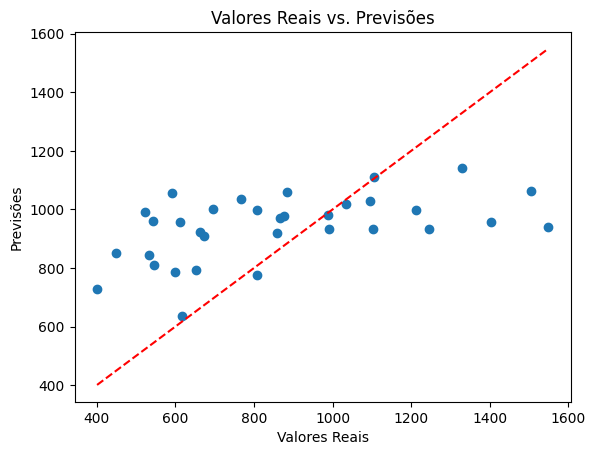

In [ ]:
plt.scatter(y_test_bow, predBow)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Valores Reais vs. Previsões")

# Linha diagonal representando uma previsão perfeita
plt.plot([min(y_test_bow), max(y_test_bow)], [min(y_test_bow), max(y_test_bow)], linestyle='--', color='red')

plt.show()

In [ ]:
X_tfidf = X_TFIDF.toarray()
y_tfidf = df['claps']

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size = 0.3, random_state=15)

In [ ]:
reg = LinearRegression()
reg.fit(X_train_tfidf, y_train_tfidf)
predTFIDF=reg.predict(X_test_tfidf)

In [ ]:
mse2 = mean_squared_error(y_test_tfidf, predTFIDF)
r2_2 = r2_score(y_test_tfidf, predTFIDF)
print("MSE:", mse2)
print("R2:", r2_2)

MSE: 79192.3981034193
R2: 0.18947160113612738


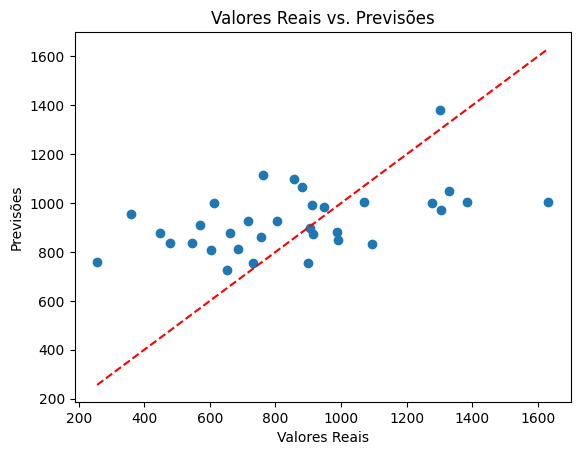

In [ ]:
plt.scatter(y_test_tfidf, predTFIDF)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Valores Reais vs. Previsões")

# Linha diagonal representando uma previsão perfeita
plt.plot([min(y_test_tfidf), max(y_test_tfidf)], [min(y_test_tfidf), max(y_test_tfidf)], linestyle='--', color='red')

plt.show()

In [ ]:
#usar outros modelos de regressão pra ver se melhora

#4 Embedding:

Agora testarei fazer os embeddings a partir do dataset apresentado, os embeddings, pela quantidade de dados disponíveis, provavelmente, não será dos melhores. Poderia pegar modelos prontos de embeddings, porém pelo teste apenas farei um novo e básico com os textos disponíveis nesse notebook.

In [ ]:
#Vou fazer uma nova coluna, pois para fazer os embeddings não é necessário lematizar.
df['texto_emb']=df['text'].apply(tokenização_remov_stopwords)

In [ ]:
from gensim.models import Word2Vec
dimensões = 100
contexto= 5

In [ ]:
modelo_skip_gram = Word2Vec(sentences=df['texto_emb'], vector_size=dimensões, window=contexto, sg=1, epochs=10)
modelo_CBOW = Word2Vec(sentences=df['texto_emb'], vector_size=dimensões, window=contexto, sg=0, epochs=10)

Agora vão alguns exemplos dos resultados comparando dois modelos, o skip_gram e o CBOW, com palavras bem constantes nos textos analisados.

In [ ]:
rede = modelo_CBOW.wv["rede"]

In [ ]:
rede

array([-0.36681244,  0.16604443, -0.19539264,  0.29271856,  0.2825463 ,
       -0.01752105,  0.63163817,  0.8231068 , -0.71687764, -0.17380212,
       -0.42902306, -0.09034526,  0.28838587,  0.14411987, -0.44451183,
       -0.16362396,  0.24821502, -0.8860096 , -0.18822505, -1.5367463 ,
        0.7342172 , -0.12104648,  0.24805424, -0.48606518, -0.5255734 ,
       -0.42548817, -0.51564395,  0.01781628, -0.30819356,  0.23770404,
        0.10605159,  0.10594027,  0.12420648,  0.18982168, -0.3400809 ,
        0.8700588 ,  0.05465276, -0.12757106, -0.50966364, -0.87914646,
        0.7001637 , -0.4692764 ,  0.00421026, -0.1473062 ,  0.5749806 ,
       -0.04400584,  0.09946147, -0.01642791,  0.51098335,  0.28941727,
        0.150504  , -0.03338316, -0.00866077,  0.12379351, -0.18681885,
        0.23406866, -0.3322059 , -0.33598572, -0.9964029 , -0.43058386,
        0.22796081, -0.3365994 , -0.24854201, -0.3518249 , -0.6489153 ,
        0.46644613,  0.5734394 ,  0.07862648, -0.699385  ,  0.52

In [ ]:
modelo_CBOW.wv.most_similar("python", topn=10)

[('bibliotecas', 0.98695969581604),
 ('análise', 0.9793411493301392),
 ('biblioteca', 0.9785586595535278),
 ('nltk', 0.9782431125640869),
 ('algumas', 0.9778957962989807),
 ('pandas', 0.97238689661026),
 ('ferramentas', 0.9708137512207031),
 ('métodos', 0.970407247543335),
 ('aplicar', 0.9680438041687012),
 ('importar', 0.9667776226997375)]

In [ ]:
modelo_skip_gram.wv.most_similar("python", topn=10)

[('pacotes', 0.89881432056427),
 ('numpy', 0.8911175727844238),
 ('pip', 0.8880391120910645),
 ('versão', 0.8812695145606995),
 ('requests', 0.880132794380188),
 ('instalar', 0.8759921789169312),
 ('spacy', 0.8753595948219299),
 ('beautifulsoup', 0.8694775104522705),
 ('install', 0.8679547309875488),
 ('instalado', 0.8652439713478088)]

In [ ]:
modelo_CBOW.wv.most_similar('rede', topn=10)

[('neural', 0.8478122353553772),
 ('convolucional', 0.8382838368415833),
 ('torch', 0.833432137966156),
 ('treinar', 0.8253964781761169),
 ('camadas', 0.8216264247894287),
 ('precisamos', 0.8150615692138672),
 ('criar', 0.802791178226471),
 ('treinamento', 0.8026337027549744),
 ('treinada', 0.802398681640625),
 ('neurônios', 0.8000085949897766)]

In [ ]:
modelo_CBOW.wv.similarity('rede', 'python')

0.657055

Vamos testar as analogias de palavras:

In [ ]:
def analogia(modelo, palavra_soma1, palavra_soma2, palavra_negativa):
  analogia = modelo.wv.most_similar(positive=[palavra_soma1, palavra_soma2], negative=[palavra_negativa], topn=1)
  return analogia

In [ ]:
analogia(modelo_CBOW, 'rede', 'convolucional', 'neural')

[('torch', 0.8738280534744263)]

In [ ]:
analogia(modelo_skip_gram, 'rede', 'convolucional', 'neural')

[('implementada', 0.7795159816741943)]

In [ ]:
analogia(modelo_CBOW, 'python', 'pacotes', 'instalar')

[('utilizar', 0.9744222164154053)]

In [ ]:
analogia(modelo_skip_gram, 'python', 'pacotes', 'instalar')

[('versões', 0.8703484535217285)]

In [ ]:
analogia(modelo_CBOW, 'inteligência', 'linguagem', 'artificial')

[('natural', 0.9889904856681824)]

In [ ]:
analogia(modelo_skip_gram, 'inteligência', 'linguagem', 'artificial')

[('natural', 0.9294342994689941)]

É possível ver que as analogias fazem sentido, trazem palavras em que é possível notar a relação criada pela função.

Farei os mesmo testes, porém variando as dimensões dos embeddings, aumentado-os e diminuindo-os, usarei apenas CBOW, pois apresentou resultados mais interessantes.

In [ ]:
dimensões = 10

In [ ]:
modelo_CBOW = Word2Vec(sentences=df['texto_emb'], vector_size=dimensões, window=contexto, sg=0, epochs=10)

In [ ]:
rede = modelo_CBOW.wv["rede"]
rede

array([ 0.51542526,  1.4178147 ,  3.1603405 , -0.5889736 , -2.6242278 ,
        0.60484445,  2.2433496 ,  0.8585933 , -0.38840348, -0.8754182 ],
      dtype=float32)

In [ ]:
modelo_CBOW.wv.most_similar('rede', topn=10)

[('criar', 0.7809261083602905),
 ('tipo', 0.7677011489868164),
 ('descendente', 0.7592505216598511),
 ('método', 0.7458010315895081),
 ('primeiro', 0.727073609828949),
 ('código', 0.7260300517082214),
 ('treinada', 0.7252087593078613),
 ('melhor', 0.7225546836853027),
 ('passo', 0.7189661860466003),
 ('treinar', 0.7186588644981384)]

In [ ]:
modelo_CBOW.wv.most_similar("python", topn=10)

[('biblioteca', 0.9612866640090942),
 ('nltk', 0.9252141118049622),
 ('bibliotecas', 0.9240397810935974),
 ('algumas', 0.8983113765716553),
 ('análise', 0.8977610468864441),
 ('utilizar', 0.8858351707458496),
 ('código', 0.8816490173339844),
 ('filtrar', 0.8713682293891907),
 ('vamos', 0.8697175979614258),
 ('alguns', 0.8691532015800476)]

In [ ]:
modelo_CBOW.wv.similarity('rede', 'python')

0.5585377

In [ ]:
analogia(modelo_CBOW, 'rede', 'convolucional', 'neural')

[('funcionalidades', 0.8418689966201782)]

In [ ]:
analogia(modelo_CBOW, 'inteligência', 'linguagem', 'artificial')

[('abordado', 0.9372997283935547)]

In [ ]:
analogia(modelo_CBOW, 'python', 'pacotes', 'instalar')

[('biblioteca', 0.9052190184593201)]

Provavelmente pela baixa dimensionalidade algumas das funções acabam apresentando resultados não muito interessantes.

In [ ]:
dimensões = 500

In [ ]:
modelo_CBOW = Word2Vec(sentences=df['texto_emb'], vector_size=dimensões, window=contexto, sg=0, epochs=10)

In [ ]:
rede = modelo_CBOW.wv["rede"]
rede

array([ 2.22413331e-01,  3.46472174e-01,  6.32724445e-03,  2.37687379e-01,
       -1.47338256e-01, -1.97119191e-01,  3.56037878e-02,  3.61162484e-01,
        4.93390486e-02,  1.78491518e-01, -1.28873557e-01,  2.96662569e-01,
        5.06810322e-02, -2.14484986e-02,  1.19349137e-01,  4.33469284e-03,
       -1.31197840e-01,  1.78843960e-02,  1.76853821e-01, -1.86892942e-01,
        9.43736732e-02, -5.80335259e-02,  1.41269401e-01,  3.75228818e-03,
        1.87682375e-01, -1.12576038e-01,  3.72759461e-01, -7.43059162e-03,
       -2.65564114e-01,  1.44707337e-01,  2.05978096e-01, -1.70430802e-02,
       -1.99382603e-01, -6.93896934e-02,  1.30577874e-03,  6.58558868e-03,
        8.70945901e-02, -1.68241113e-01, -1.43234760e-01, -2.82403290e-01,
        5.23834899e-02,  2.55447533e-02, -2.79269785e-01,  1.03881054e-01,
       -1.22166820e-01, -2.89150298e-01, -2.06607804e-01,  3.22273970e-02,
       -2.33006790e-01, -1.53794095e-01,  1.57348011e-02, -1.58303514e-01,
       -1.56317040e-01, -

In [ ]:
modelo_CBOW.wv.most_similar('rede', topn=10)

[('neural', 0.9335311055183411),
 ('dataset', 0.9162347912788391),
 ('erro', 0.9157459735870361),
 ('conjunto', 0.913995087146759),
 ('imagem', 0.9131611585617065),
 ('parâmetros', 0.9130321145057678),
 ('precisamos', 0.9124004244804382),
 ('partir', 0.910020649433136),
 ('forma', 0.909677267074585),
 ('acima', 0.9091996550559998)]

In [ ]:
modelo_CBOW.wv.most_similar("python", topn=10)

[('bibliotecas', 0.9960728883743286),
 ('nltk', 0.9943804740905762),
 ('algumas', 0.9937997460365295),
 ('agora', 0.9934364557266235),
 ('pandas', 0.9930561184883118),
 ('importar', 0.9921028017997742),
 ('métodos', 0.9919045567512512),
 ('primeiro', 0.9918662905693054),
 ('principais', 0.9917483329772949),
 ('entender', 0.99171382188797)]

In [ ]:
modelo_CBOW.wv.similarity('rede', 'python')

0.79529774

In [ ]:
analogia(modelo_CBOW, 'rede', 'convolucional', 'neural')

[('implementada', 0.9328182935714722)]

In [ ]:
analogia(modelo_CBOW, 'inteligência', 'linguagem', 'artificial')

[('natural', 0.9961012005805969)]

In [ ]:
analogia(modelo_CBOW, 'python', 'pacotes', 'instalar')

[('algumas', 0.9951919317245483)]

Esse número alto de embeddings também gerou resultados mais confusos e menos produtivos.

In [ ]:
dimensões = 1000

In [ ]:
modelo_CBOW = Word2Vec(sentences=df['texto_emb'], vector_size=dimensões, window=contexto, sg=0, epochs=10)

In [ ]:
modelo_CBOW.wv.most_similar('rede', topn=10)

[('neural', 0.9730989336967468),
 ('parâmetros', 0.9664744138717651),
 ('erro', 0.9643709659576416),
 ('conjunto', 0.9643197059631348),
 ('custo', 0.963556170463562),
 ('entrada', 0.962872326374054),
 ('dataset', 0.9618158340454102),
 ('partir', 0.9617351293563843),
 ('tamanho', 0.9613180160522461),
 ('base', 0.9606749415397644)]

In [ ]:
modelo_CBOW.wv.most_similar("python", topn=10)

[('algumas', 0.9976314306259155),
 ('começar', 0.9975298643112183),
 ('importar', 0.9973495006561279),
 ('nltk', 0.9967041611671448),
 ('ver', 0.9966059923171997),
 ('primeiro', 0.9961785078048706),
 ('pandas', 0.9960833787918091),
 ('desbalanceados', 0.995983362197876),
 ('entender', 0.9959710836410522),
 ('implementação', 0.9959138035774231)]

In [ ]:
modelo_CBOW.wv.similarity('rede', 'python')

0.9012755

In [ ]:
analogia(modelo_CBOW, 'rede', 'convolucional', 'neural')

[('torch', 0.9710482358932495)]

In [ ]:
analogia(modelo_CBOW, 'inteligência', 'linguagem', 'artificial')

[('natural', 0.9980757832527161)]

In [ ]:
analogia(modelo_CBOW, 'python', 'pacotes', 'instalar')

[('código', 0.9973474740982056)]

As porcentagens com as 1000 dimensões parecem muito elevadas, além disso seguiu um pouco a tendência das 500 dimensões com resultados menos interessantes.

É nítido que resultados bons e alto número de dimensões não é uma relação diretamente proporcional, mas um número baixo de dimensões também não gera bons resultados, devemos então achar um meio termo que gere os melhores resultado.

#5 Sumarização:

##Sumarização extrativa:

A extrativa é uma técnica que seleciona as frases mais importantes do texto e as apresenta como um resumo.

In [ ]:
for i in range(len(df['text'])):
  if "Rosa" in df['text'][i]:
    print(i)

89
96


In [ ]:
df['text'][89]

'Talvez você já tenha visto alguns exemplos pela internet sobre IA\' s ou bots treinados em milhares de textos para escrever como um autor específico ou replicar um gênero textual. Diferentes técnicas podem ser usadas para gerar esse tipo de resultado. Hoje, vamos ver como construir um modelo para "escrever" como João Guimarães Rosa utilizando Redes Neurais Recorrentes. Explicarei aqui o básico sobre esse tipo de Rede Neural, mas, se quiser se aprofundar sobre o assunto, recomendo o nosso Turing Talks sobre o tema: Se quiser conferir o projeto diretamente, você pode acessar o repositório do github com o código completo, ou então o site com o gerador de texto aqui. Antes de começarmos a falar sobre o nosso modelo, vamos antes ver um pouco melhor qual é a nossa tarefa em questão. Um modelo de língua possui uma tarefa bem simples: prever a próxima palavra ou caractere em uma sentença. Qualquer tipo de modelo que esteja cumprindo com essa tarefa, ou sendo treinado para isso, pode ser carac

In [ ]:
escolhido=df['text'][89]

In [ ]:
!pip install bert-extractive-summarizer

In [ ]:
from summarizer import Summarizer
model = Summarizer()

In [ ]:
def sumarizacao_extrativa(text):
  extractive = model(text, num_sentences=15)
  return extractive

In [ ]:
sumarizacao_extrativa(escolhido)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'Talvez você já tenha visto alguns exemplos pela internet sobre IA\' s ou bots treinados em milhares de textos para escrever como um autor específico ou replicar um gênero textual. Diferentes técnicas podem ser usadas para gerar esse tipo de resultado. João Guimarães Rosa é sem dúvida um dos maiores escritores da nossa literatura. Além de escrever contos e romances, Rosa foi também médico e diplomata brasileiro. Neste caso, iremos criar dois tipos de vetores numéricos: Aqui, criamos três representações importantes: temos o char2idx para codificar o nosso texto em uma representação numérica, o idx2char para decodificar o texto e text_as_int , que representa o nosso texto já codificado. Quando temos dados que são dispostos em uma ordem específica, utilizamos modelos sequenciais, como uma Rede Neural Recorrente (Recurrent Neural Network, em inglês — RNN), por exemplo. Sendo assim, representaremos os nossos dados em "timesteps", e para fazermos previsões sequenciais cada y<t> (output) leva

Com esse uso, é possível entender o objetivo e o tema geral do texto, porém fica algo muito desconexo, e não funciona tão bem como um resumo humano normal.

##Sumarização abstrativa:

A sumarização abstrativa é uma técnica que usa de modelos complexos de deep learning para tentar realmente extrair a essência do texto e escrever um resumo tentando imitar a escrita humana. Os algoritmos usados são muito mais complexos que o da extrativa, porém apenas importarei modelos já treinados, além de algo mais prático o resultado deles será inevitavelmente melhor, e os aplicarei ao turing talks escolhido

Para importar o modelo basta usar buscar um no hugging face, inicializá-lo e aplicar ao texto.

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
sumarizador = pipeline("summarization", model="facebook/bart-large-cnn")

In [ ]:
print(sumarizador(escolhido, max_length=1000, min_length=100, truncation=True, do_sample=False))

[{'summary_text': 'Vamos ver como construir um modelo para "escrever" como João Guimarães Rosa utilizando Redes Neurais Recorrentes. A modelo de língua possui uma tarefa bem simples: prever a próxima palavra ou caractere em uma sentença. O modelo irá aprender a distribuição de probabilidades em uMA sequência de palavras.'}]


Apesar do resultado conseguir resumir o assunto do texto, ele acaba sendo muito curto, cortando muita informação, e ele apresenta problemas como erro na escrita do gênero de palavra.